In [539]:
#data: https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download
#code: https://www.datacamp.com/tutorial/k-means-clustering-python

In [540]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/michhottinger/CS-Data-Science-Build-Week-1/master/datasets_33180_43520_heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [541]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [542]:
from sklearn.model_selection import train_test_split

x_columns = ['age', 'sex', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'thal']
y_columns = ['target']
X_train, X_test, y_train, y_test = train_test_split(df[x_columns], df[y_columns], test_size=0.33, random_state=0)

In [543]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [544]:
X_train.head()

,age,sex,chol,fbs,restecg,thalach,exang,oldpeak,thal
252,62,0,294,1,1,106,0,1.9,2
54,63,0,252,0,0,172,0,0.0,2
234,70,1,322,0,0,109,0,2.4,2
18,43,1,247,0,1,171,0,1.5,2
205,52,1,255,0,1,161,1,0.0,3


In [545]:
print(X_train_norm[:5])

[[0.19458255 0.         0.92269789 0.00313843 0.00313843 0.33267339
  0.         0.00596301 0.00627686]
 [0.20221724 0.         0.80886894 0.         0.         0.55208515
  0.         0.         0.00641959]
 [0.20167321 0.00288105 0.92769675 0.         0.         0.31403399
  0.         0.00691451 0.00576209]
 [0.14168424 0.00329498 0.81386064 0.         0.00329498 0.56344198
  0.         0.00494247 0.00658996]
 [0.16991105 0.00326752 0.83321766 0.         0.00326752 0.52607076
  0.00326752 0.         0.00980256]]


In [546]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

In [547]:
# sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

In [548]:
# sns.boxplot(x = kmeans.labels_, y = y_train['target'])

In [549]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.42185166328143636)

### choose the best number of clusters

In [550]:
K = range(2, 20)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: >

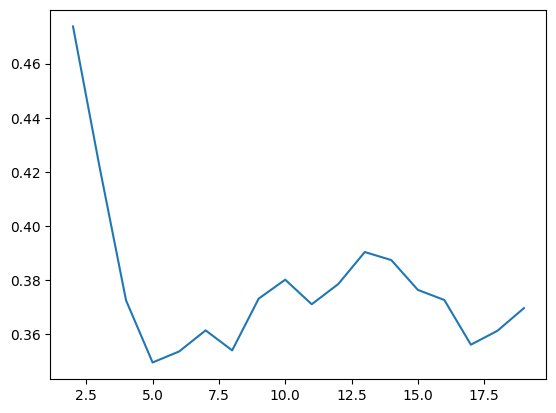

In [551]:
sns.lineplot(x = K, y = score)

In [552]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, f1_score

def show_psi(y_pred, y_pred_drift):
    y_pred = np.vectorize({False: 0, True: 1}.get)(y_pred)
    y_pred_drift = np.vectorize({False: 0, True: 1}.get)(y_pred_drift)
    psi_diff = calculate_psi(y_pred, y_pred_drift, buckets=2, axis=1)
    print("PSI Difference:", psi_diff)

def show_confusion_matrix(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)

In [553]:
# Initialize the kmeans class
model = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
model.fit(X_train_norm)
y_pred = model.predict(X_test_norm)
y_pred
# Show confusion matrix
# print("--------no drift--------")
# show_confusion_matrix(y_test, y_pred)

# # Make data quality drift predictions
# X_test_drift = rf_drift.data_drift_injection(X_test, column_name="glucose")
# y_pred_drift = rf_drift.predict(X_test_drift)
# X_test_quality = rf_drift.data_quality_injection(X_test, column_name="glucose")
# y_pred_quality = rf_drift.predict(X_test_quality)
# print("----------data quality--------")
# rf_drift.show_psi(y_pred, y_pred_quality)
# rf_drift.show_confusion_matrix(y_test, y_pred_quality)
# print("----------data drift--------")
# rf_drift.show_psi(y_pred, y_pred_drift)
# rf_drift.show_confusion_matrix(y_test, y_pred_drift)

array([1, 1, 0, 0, 1, 0, 1, 1, 3, 3, 2, 0, 0, 1, 4, 1, 1, 4, 3, 4, 4, 1,
       3, 0, 1, 3, 4, 0, 4, 4, 2, 0, 0, 4, 2, 0, 3, 0, 0, 1, 4, 0, 4, 3,
       1, 1, 4, 4, 3, 4, 0, 3, 1, 1, 2, 4, 0, 4, 4, 1, 0, 4, 0, 4, 1, 4,
       4, 0, 4, 4, 1, 4, 4, 0, 0, 1, 4, 4, 4, 0, 1, 3, 0, 2, 1, 4, 3, 1,
       4, 3, 0, 1, 1, 1, 0, 3, 0, 3, 4, 1], dtype=int32)

In [554]:
X_train.head()

,age,sex,chol,fbs,restecg,thalach,exang,oldpeak,thal
252,62,0,294,1,1,106,0,1.9,2
54,63,0,252,0,0,172,0,0.0,2
234,70,1,322,0,0,109,0,2.4,2
18,43,1,247,0,1,171,0,1.5,2
205,52,1,255,0,1,161,1,0.0,3


### data drift

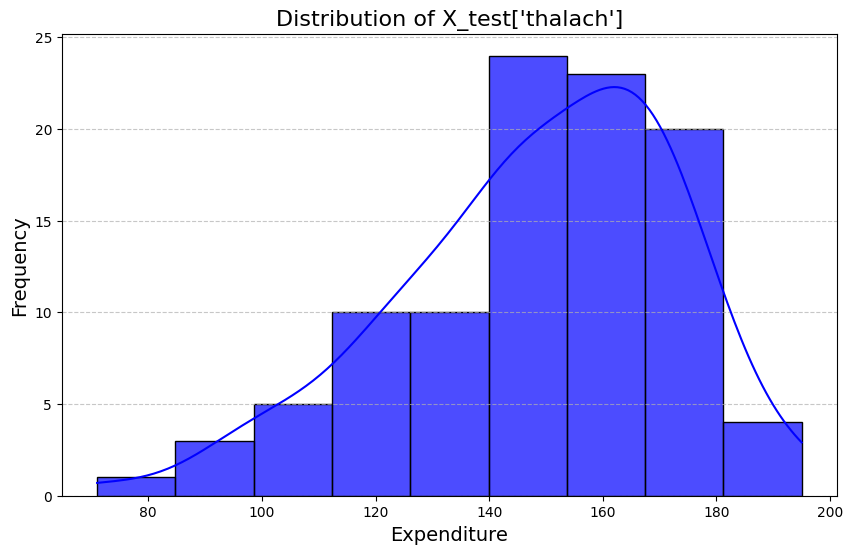

In [555]:
import matplotlib.pyplot as plt
import seaborn as sns
X_test_drift = X_test.copy()

# Plot the distribution of 'expenditure'
plt.figure(figsize=(10, 6))
sns.histplot(X_test_drift['thalach'], kde=True, color='blue', alpha=0.7)
plt.title('Distribution of X_test[\'thalach\']', fontsize=16)
plt.xlabel('Expenditure', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

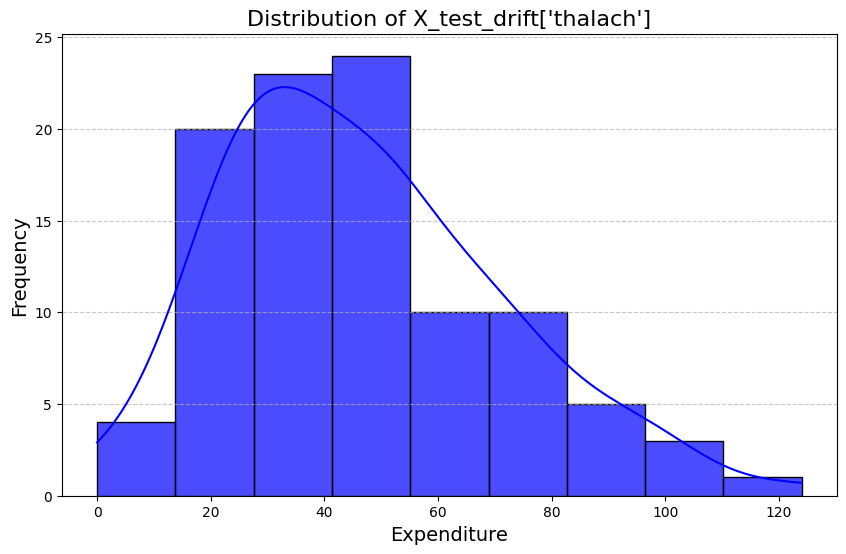

In [556]:
max_value = X_test['thalach'].max()
X_test_drift['thalach'] = max_value - X_test_drift['thalach']

# Plot the distribution of 'expenditure'
plt.figure(figsize=(10, 6))
sns.histplot(X_test_drift['thalach'], kde=True, color='blue', alpha=0.7)
plt.title('Distribution of X_test_drift[\'thalach\']', fontsize=16)
plt.xlabel('Expenditure', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [557]:
X_test_drift_norm = preprocessing.normalize(X_test_drift)
y_pred_drift = model.predict(X_test_drift_norm)
len(y_pred_drift)

100

In [570]:
import numpy as np
import pandas as pd
num_iterations = 200

def get_simulation_input(X_test, X_test_drift, y_pred, y_pred_drift, sample_size = 50):
    # Store results for each iteration
    X_results = []
    y_results = []

    df_X = pd.DataFrame(columns=X_test.columns)
    arr_y = np.array([])

    for i in range(1, num_iterations + 1):
        if i <= 100:
            # First 100 iterations: Choose from X_test and y_pred
            random_indices = np.random.choice(len(y_pred), size=sample_size, replace=False)
            X_sample = X_test.iloc[random_indices]
            y_sample = y_pred[random_indices]
            # print(type(X_sample))
            # print(type(y_sample))
        elif 101 <= i <= 110:
            # Iterations 101-110: Choose from X_test_drift and y_pred_drift
            random_indices = np.random.choice(len(y_pred_drift), size=sample_size, replace=False)
            X_sample = X_test_drift.iloc[random_indices]
            y_sample = y_pred_drift[random_indices]
        else:
            # Iterations 111-200: Choose from X_test and y_pred
            random_indices = np.random.choice(len(y_pred), size=sample_size, replace=False)
            X_sample = X_test.iloc[random_indices]
            y_sample = y_pred[random_indices]

        df_X = pd.concat([df_X, X_sample], ignore_index=True)
        arr_y = np.append(arr_y, y_sample)
    return df_X, arr_y


In [571]:
from psi import calculate_psi


def get_psi_for_simulation_data(arr_y, window_size = 300):
    psi_values = []
    results = arr_y
    # Check if results array has enough data
    if len(results) < window_size:
        print("Not enough data in results for sliding window.")
    else:
        # Sliding window loop
        for start in range(len(results) - window_size + 1):
            # Get the current window
            window = results[start:start + window_size]
        
            # Extract expected and actual values
            expected = window[:window_size // 2]  # First half of the window
            actual = window[window_size // 2:]   # Second half of the window
        
            # Debugging: Check sizes
            # print(f"Processing window starting at index {start}")
            # print(f"Expected size: {len(expected)}, Actual size: {len(actual)}")
        
            # Calculate PSI for the current window
            psi_value = calculate_psi(expected, actual, buckets=2, axis=0)
            psi_values.append(psi_value)
    return psi_values

In [572]:
import matplotlib.pyplot as plt

def plot_psi(psi_values, title):
    # Assuming psi_values is already calculated
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(psi_values)), psi_values, marker='o', linestyle='-', color='b', label='PSI Value')
    # plt.title('PSI Values Over Sliding Windows for classification result (y): model drift by data drift', fontsize=16)
    plt.title(title, fontsize=16)
    plt.xlabel('Sliding Window Index', fontsize=14)
    plt.ylabel('PSI Value', fontsize=14)
    plt.axhline(y=0.1, color='r', linestyle='--', label='Threshold (0.1)')
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

/tmp/ipykernel_14046/2162101373.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_X = pd.concat([df_X, X_sample], ignore_index=True)


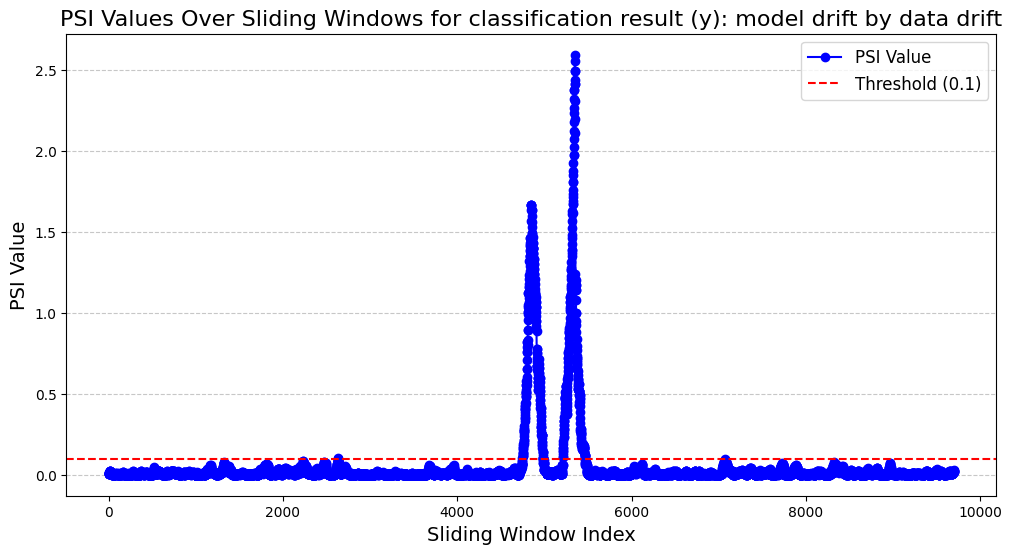

In [573]:
df_X, arry_y =  get_simulation_input(X_test, X_test_drift,y_pred, y_pred_drift, sample_size = 50)
psi_values = get_psi_for_simulation_data(arr_y, window_size = 300)
title='PSI Values Over Sliding Windows for classification result (y): model drift by data drift'
plot_psi(psi_values, title)

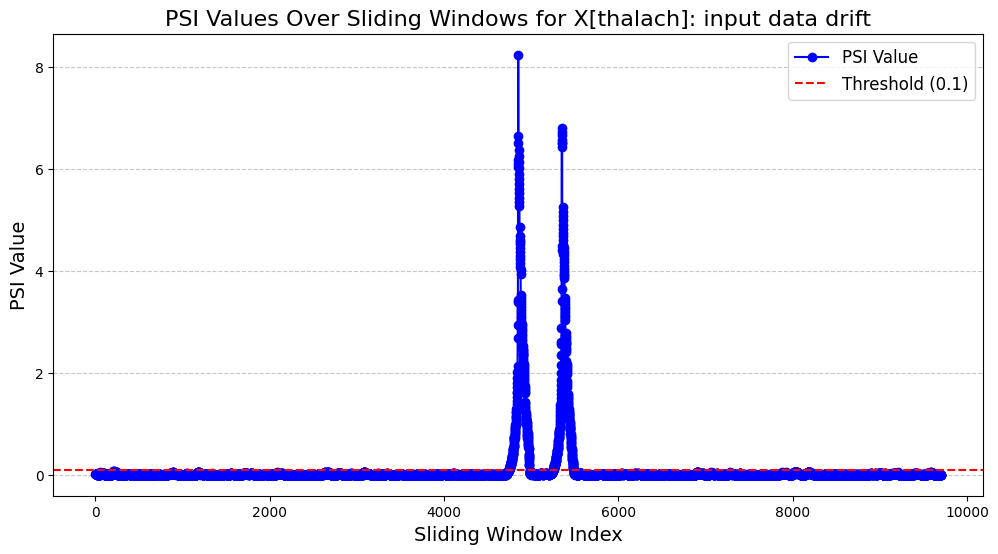

In [574]:
results = df_X['thalach']
psi_values = get_psi_for_simulation_data(results, window_size = 300)
title='PSI Values Over Sliding Windows for X[thalach]: input data drift'
plot_psi(psi_values, title)

## data quality

In [583]:
X_test_quality = X_test.copy()
X_test_quality['thalach'] = 0 - X_test_quality['thalach']
X_test_quality_norm = preprocessing.normalize(X_test_quality)
y_pred_quality = model.predict(X_test_quality_norm)

/tmp/ipykernel_14046/2162101373.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_X = pd.concat([df_X, X_sample], ignore_index=True)


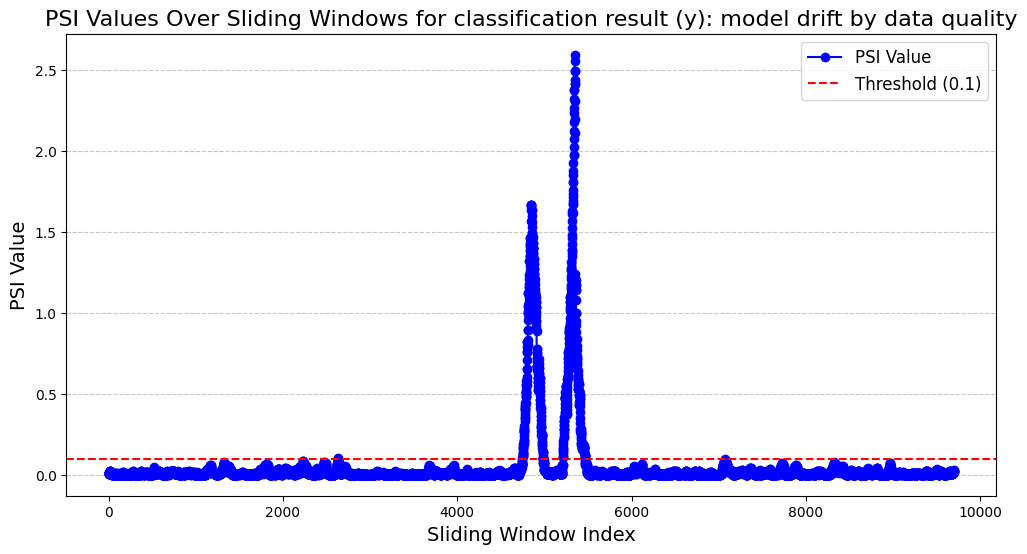

In [584]:
df_X, arry_y =  get_simulation_input(X_test, X_test_quality, y_pred, y_pred_quality, sample_size = 50)
psi_values = get_psi_for_simulation_data(arr_y, window_size = 300)
title='PSI Values Over Sliding Windows for classification result (y): model drift by data quality'
plot_psi(psi_values, title)

In [565]:
def save_drift_output(X_test_drifted, y_test, y_pred, y_pred_drifted, filename):
    test_results = X_test_drifted.copy()
    test_results['true_label'] = y_test.values
    test_results['y_pred'] = y_pred
    test_results['y_pred_drifted'] = y_pred_drifted
    test_results.head()
    test_results.to_csv(filename, index=False)

def save_normal_output(X_test, y_test, y_pred, filename):
    test_results = X_test.copy()
    test_results['true_label'] = y_test.values
    test_results['y_pred'] = y_pred
    test_results.head()
    test_results.to_csv(filename, index=False)

In [566]:
outputfolder="output/heartdisease"
save_normal_output(X_test, y_test, y_pred, f"{outputfolder}/normal_output.csv")
save_drift_output(X_test_drifted=X_test_drift,y_test=y_test,y_pred=y_pred,y_pred_drifted=y_pred_drift,filename=f"{outputfolder}/data_drift_output.csv")
save_drift_output(X_test_drifted=X_test_quality,y_test=y_test,y_pred=y_pred,y_pred_drifted=y_pred_quality,filename=f"{outputfolder}/data_quality_output.csv")


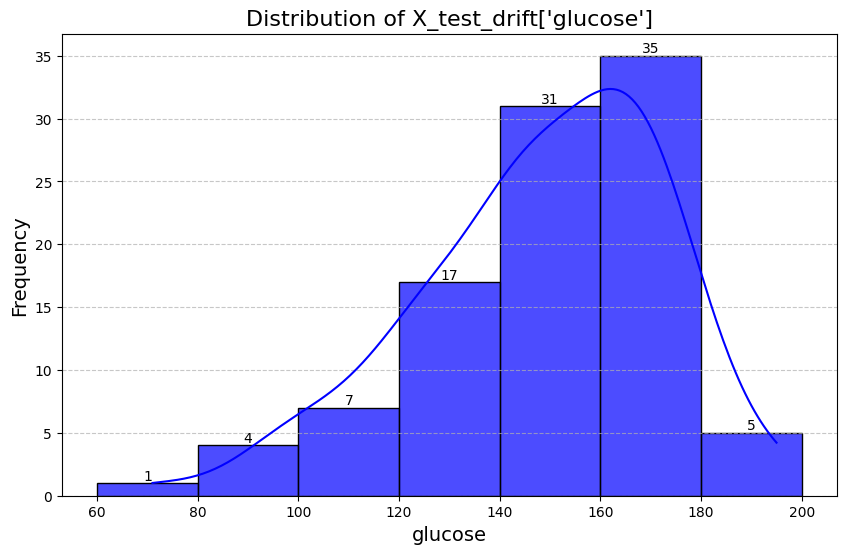

In [568]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'pedigree'
plt.figure(figsize=(10, 6))
ax = sns.histplot(X_test['thalach'], kde=True, color='blue', alpha=0.7, bins=[60, 80, 100, 120, 140, 160, 180, 200], binrange=(0, 200))

# Annotate each bar with its height
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{int(height)}', 
                    (patch.get_x() + patch.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution of X_test_drift[\'glucose\']', fontsize=16)
plt.xlabel('glucose', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [585]:
values, counts = np.unique(y_pred, return_counts=True)
percents = counts/sum(counts)

# Print the results
for value, percentage in zip(values, percents):
    print(f"Value: {value}, Occurrence Percentage: {percentage:.2f}")

Value: 0, Occurrence Percentage: 0.25
Value: 1, Occurrence Percentage: 0.26
Value: 2, Occurrence Percentage: 0.05
Value: 3, Occurrence Percentage: 0.14
Value: 4, Occurrence Percentage: 0.30


In [ ]:
1,4,7,17,31,35,5